In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [5]:
finals_roster = 'Resources/16-17 finals team payroll.csv'

finals_df = pd.read_csv(finals_roster)

finals_df

,Player,Team,Age,Position,Salary
0,Kevin Durant,GSW,28,F,26540100
1,Klay Thompson,GSW,27,G,16663575
2,Draymond Green,GSW,27,F,15330435
3,Stephen Curry,GSW,29,G,12112359
4,Andre Iguodala,GSW,33,F,11131368
5,Shaun Livingston,GSW,31,G,5782450
6,Zaza Pachulia,GSW,33,C,2898000
7,David West,GSW,36,C,1551659
8,JaVale McGee,GSW,29,C,1403611
9,Kevon Looney,GSW,21,C,1182840


In [7]:
#Team Payrolls
teams_df = finals_df.groupby("Team")

payrolls_df = teams_df["Salary"].sum()

team_payroll_df = pd.DataFrame({"Total Payroll": payrolls_df})

team_payroll_df

,Total Payroll
Team,
CLE,125924852
GSW,98307555


In [8]:
# Average Guard Salaries and Percent of Payroll

guard_df = finals_df[finals_df['Position'].str.startswith('G')]

teams_df = guard_df.groupby("Team")

guard_salary_df = teams_df["Salary"].sum()

guard_percent_df = guard_salary_df / payrolls_df * 100

team_guard_salaries_df =  pd.DataFrame({"Guards (G)": guard_salary_df,
                                       "% of Total Payroll (G)": guard_percent_df})

team_guard_salaries_df

,Guards (G),% of Total Payroll (G)
Team,,
CLE,46448626,36.885988
GSW,36117551,36.739344


In [9]:
# Average Forward Salaries and Percent of Payroll 

forward_df = finals_df[finals_df['Position'].str.startswith('F')]

teams_df = forward_df.groupby("Team")

forward_salary_df = teams_df["Salary"].sum()

forward_percent_df = forward_salary_df / payrolls_df * 100

team_forward_salaries_df =  pd.DataFrame({"Forwards (F)": forward_salary_df,
                                       "% of Total Payroll (F)": forward_percent_df})

team_forward_salaries_df

,Forwards (F),% of Total Payroll (F)
Team,,
CLE,56338820,44.740033
GSW,53982334,54.911684


In [10]:
# Average Center Salaries and Percent of Payroll

center_df = finals_df[finals_df['Position'].str.startswith('C')]

teams_df = center_df.groupby("Team")

center_salary_df = teams_df["Salary"].sum()

center_percent_df = center_salary_df / payrolls_df * 100

team_center_salaries_df =  pd.DataFrame({"Centers (C)": center_salary_df,
                                       "% of Total Payroll (C)": center_percent_df})

team_center_salaries_df

,Centers (C),% of Total Payroll (C)
Team,,
CLE,23137406,18.373979
GSW,8207670,8.348972


In [11]:
# Average Age of Rosters

teams_df = finals_df.groupby("Team")

average_age_df = teams_df["Age"].mean()

age_comp_df = pd.DataFrame({"Avg. Age": average_age_df})

age_comp_df

,Avg. Age
Team,
CLE,30.500000
GSW,27.571429


In [12]:
# Average Age of Guards

guard_df = finals_df[finals_df['Position'].str.startswith('G')]

teams_df = guard_df.groupby("Team")

guard_average_age_df = teams_df["Age"].mean()

g_age_comp_df = pd.DataFrame({"Avg. Age (G)": guard_average_age_df})

g_age_comp_df

,Avg. Age (G)
Team,
CLE,28.285714
GSW,26.800000


In [13]:
#Average Age of Forwards
forward_df = finals_df[finals_df['Position'].str.startswith('F')]

teams_df = forward_df.groupby("Team")

forward_average_age_df = teams_df["Age"].mean()

f_age_comp_df = pd.DataFrame({"Avg. Age (F)": forward_average_age_df})

f_age_comp_df

,Avg. Age (F)
Team,
CLE,32.857143
GSW,28.000000


In [14]:
#Average Age of Centers
center_df = finals_df[finals_df['Position'].str.startswith('C')]

teams_df = center_df.groupby("Team")

center_average_age_df = teams_df["Age"].mean()

c_age_comp_df = pd.DataFrame({"Avg. Age (C)": center_average_age_df})

c_age_comp_df

,Avg. Age (C)
Team,
CLE,30
GSW,28


In [15]:
#Age and Salary Summary for All Positions into Summary Table
teams_merge1_df = pd.merge(team_payroll_df,age_comp_df,on="Team")
teams_merge2_df = pd.merge(teams_merge1_df,team_guard_salaries_df,on="Team")
teams_merge3_df = pd.merge(teams_merge2_df,g_age_comp_df,on="Team")
teams_merge4_df = pd.merge(teams_merge3_df,team_forward_salaries_df,on="Team")
teams_merge5_df = pd.merge(teams_merge4_df,f_age_comp_df,on="Team")
teams_merge6_df = pd.merge(teams_merge5_df,team_center_salaries_df,on="Team")
team_full_merge_df = pd.merge(teams_merge6_df,c_age_comp_df,on="Team")

team_full_merge_df

,Total Payroll,Avg. Age,Guards (G),% of Total Payroll (G),Avg. Age (G),Forwards (F),% of Total Payroll (F),Avg. Age (F),Centers (C),% of Total Payroll (C),Avg. Age (C)
Team,,,,,,,,,,,
CLE,125924852,30.500000,46448626,36.885988,28.285714,56338820,44.740033,32.857143,23137406,18.373979,30
GSW,98307555,27.571429,36117551,36.739344,26.800000,53982334,54.911684,28.000000,8207670,8.348972,28


In [16]:
position_group = team_full_merge_df.groupby('Team')

#Team Position Salary Breakdown
payroll_by_position = position_group['Guards (G)','Forwards (F)','Centers (C)'].sum()

payroll_by_position

<ipython-input-16-6c8fd0bb8e4d>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  payroll_by_position = position_group['Guards (G)','Forwards (F)','Centers (C)'].sum()


,Guards (G),Forwards (F),Centers (C)
Team,,,
CLE,46448626,56338820,23137406
GSW,36117551,53982334,8207670


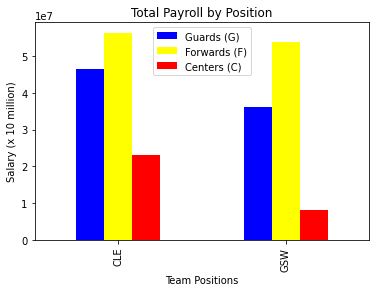

In [17]:
# Create a bar chart based off of the payroll by positon data

from matplotlib.colors import ListedColormap
colors = ListedColormap(['blue','yellow','red'],name="from_list")
position_chart = payroll_by_position.plot(kind='bar',colormap = colors)
position_chart.set_xlabel("Team Positions")
position_chart.set_ylabel("Salary (x 10 million)")
plt.title("Total Payroll by Position")
plt.savefig('positionpayroll.png')
plt.show()

In [18]:
position_age = team_full_merge_df.groupby('Team')

#Team Average Position Salary Breakdown
position_mean_age = position_group['Avg. Age (G)','Avg. Age (F)','Avg. Age (C)'].sum()

position_mean_age

<ipython-input-18-9e5afae6e84f>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  position_mean_age = position_group['Avg. Age (G)','Avg. Age (F)','Avg. Age (C)'].sum()


,Avg. Age (G),Avg. Age (F),Avg. Age (C)
Team,,,
CLE,28.285714,32.857143,30
GSW,26.800000,28.000000,28


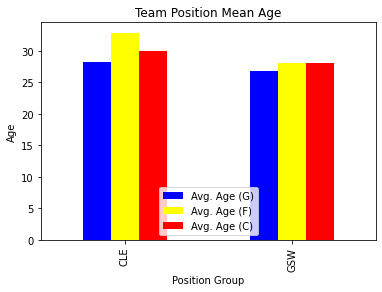

In [19]:
# Create a bar chart based off of the position_mean_age data

colors = ListedColormap(['blue','yellow','red'],name="from_list")
age_chart = position_mean_age.plot(kind='bar',colormap = colors)
age_chart.set_xlabel("Position Group")
age_chart.set_ylabel("Age")
plt.title("Team Position Mean Age")
plt.savefig('position_mean_age.png')
plt.show()

In [20]:
position_group = team_full_merge_df.groupby('Team')

# Team Position Salary Percent Breakdown
position_percent = position_group['% of Total Payroll (G)','% of Total Payroll (F)','% of Total Payroll (C)'].sum()

position_percent

<ipython-input-20-efa46a599a60>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  position_percent = position_group['% of Total Payroll (G)','% of Total Payroll (F)','% of Total Payroll (C)'].sum()


,% of Total Payroll (G),% of Total Payroll (F),% of Total Payroll (C)
Team,,,
CLE,36.885988,44.740033,18.373979
GSW,36.739344,54.911684,8.348972


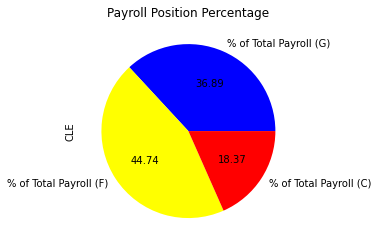

<Figure size 1080x1080 with 0 Axes>

In [21]:
east_team = "CLE"
cleveland_payroll_percent = position_percent.loc[east_team]
colors = ListedColormap(['blue','yellow','red'],name="from_list")
cleveland_payroll_percent = cleveland_payroll_percent.plot(kind="pie",colormap = colors,y= ['% of Total Payroll (G)','% of Total Payroll (F)','% of Total Payroll (C)'],autopct='%.2f',title=("Payroll Position Percentage" ))
plt.savefig('Cleveland_payroll_percent_comp.png')
plt.figure(figsize=(15,15))

plt.show()

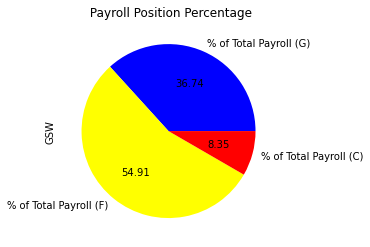

<Figure size 1080x1080 with 0 Axes>

In [22]:
west_team = "GSW"
warriors_payroll_percent = position_percent.loc[west_team]
colors = ListedColormap(['blue','yellow','red'],name="from_list")
warriors_payroll_percent = warriors_payroll_percent.plot(kind="pie",colormap = colors,y= ['% of Total Payroll (G)','% of Total Payroll (F)','% of Total Payroll (C)'],autopct='%.2f',title=(" Payroll Position Percentage" ))
plt.savefig('warriors_percent_comp.png')
plt.figure(figsize=(15,15))

plt.show()